Email spam detection

In [34]:
#importing required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot

import re #regular expressions
import nltk #python's own nlp library

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import string

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

import time
print('libraries imported')

libraries imported


reading file

In [35]:
dataset = pd.read_csv("C:\\Users\\SahithiKaringula\\LearningMaterial\\NLP-Project\\sample2.csv")
print('csv read')

csv read


checking the data read from csv

In [36]:
list(dataset)
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [37]:
dataset.shape

(5728, 2)

In [38]:
#drop duplicate data
dataset.drop_duplicates(inplace = True)
dataset.shape

(5695, 2)

In [39]:
print (pd.DataFrame(dataset.isnull().sum()))

0
text  0
spam  0


In [40]:
#split text column into array of words
dataset['text'] = dataset['text'].map(lambda text:re.sub('\W+', ' ',text)).apply(lambda x: (x.lower()).split())

#The fist word is Subjet in every column, we will remove it and take array from index 1 instead
dataset['text']=dataset['text'].map(lambda text: text[1:])

check and eliminate stopwords

In [41]:
#Remove stopword
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

dataset['text'] = dataset['text'].apply(lambda x: remove_stopwords(x))

creating the lemmas

In [42]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

dataset.head()

,text,spam
0,"[naturally, irresistible, corporate, identity,...",1
1,"[stock, trading, gunslinger, fanny, merrill, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[4, color, printing, special, request, additio...",1
4,"[money, get, software, cds, software, compatib...",1


count vectorizer

In [43]:
count_vect = CountVectorizer(analyzer=lemmatizing)
X_counts = count_vect.fit_transform(dataset['text'])
print(X_counts.shape)
print(count_vect.get_feature_names())

X_counts_df = pd.DataFrame(X_counts.toarray())

X_counts_df.columns = count_vect.get_feature_names()

X_counts_df.head()

 'vande', 'vanderbilt', 'vanderhorst', 'vandor', 'vandy', 'vanessa', 'vanish', 'vanishing', 'vanlandingham', 'vanstone', 'vaol', 'var', 'varaiya', 'varcsnl', 'vargas', 'vargo', 'variability', 'variable', 'variance', 'variant', 'variate', 'variation', 'varicoloured', 'varied', 'varies', 'variety', 'varietyof', 'varinput', 'various', 'variuous', 'varma', 'varmodel', 'varnadoe', 'varpro', 'varse', 'varseml', 'varsha', 'varshney', 'varsity', 'vartrack', 'varworks', 'vary', 'varying', 'vasant', 'vasconcellos', 'vascular', 'vasicek', 'vasquez', 'vast', 'vastly', 'vasudevan', 'vasut', 'vaticinate', 'vatour', 'vatrfacs', 'vattenfall', 'vaughan', 'vault', 'vaunted', 'vax', 'vaysman', 'vaz', 'vazquez', 'vb', 'vba', 'vbs', 'vbvfl', 'vc', 'vcd', 'vcf', 'vcon', 'vcr', 'vcs', 'vdeliver', 'vdg', 'vecchio', 'vecta', 'vector', 'vega', 'vegal', 'vegetable', 'vegetarian', 'vehemently', 'vehicle', 'vehicular', 'vein', 'veinott', 'vel', 'velaw', 'veldt', 'velocidad', 'velocity', 'velveting', 'ven', 'vend',

,0,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TfiDfi vertorizer

In [44]:
tfidf_vect = TfidfVectorizer(analyzer=lemmatizing)
X_tfidf = tfidf_vect.fit_transform(dataset['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

X_tfidf_df = pd.DataFrame(X_tfidf.toarray())

X_tfidf_df.columns = tfidf_vect.get_feature_names()

X_tfidf_df.head()

 'vande', 'vanderbilt', 'vanderhorst', 'vandor', 'vandy', 'vanessa', 'vanish', 'vanishing', 'vanlandingham', 'vanstone', 'vaol', 'var', 'varaiya', 'varcsnl', 'vargas', 'vargo', 'variability', 'variable', 'variance', 'variant', 'variate', 'variation', 'varicoloured', 'varied', 'varies', 'variety', 'varietyof', 'varinput', 'various', 'variuous', 'varma', 'varmodel', 'varnadoe', 'varpro', 'varse', 'varseml', 'varsha', 'varshney', 'varsity', 'vartrack', 'varworks', 'vary', 'varying', 'vasant', 'vasconcellos', 'vascular', 'vasicek', 'vasquez', 'vast', 'vastly', 'vasudevan', 'vasut', 'vaticinate', 'vatour', 'vatrfacs', 'vattenfall', 'vaughan', 'vault', 'vaunted', 'vax', 'vaysman', 'vaz', 'vazquez', 'vb', 'vba', 'vbs', 'vbvfl', 'vc', 'vcd', 'vcf', 'vcon', 'vcr', 'vcs', 'vdeliver', 'vdg', 'vecchio', 'vecta', 'vector', 'vega', 'vegal', 'vegetable', 'vegetarian', 'vehemently', 'vehicle', 'vehicular', 'vein', 'veinott', 'vel', 'velaw', 'veldt', 'velocidad', 'velocity', 'velveting', 'ven', 'vend',

,0,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating the features

In [45]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

dataset['body_len'] = dataset['text'].apply(lambda x: len(x) - x.count(" "))
dataset['punct%'] = dataset['text'].apply(lambda x: count_punct(x))


Plotting the features for prediction

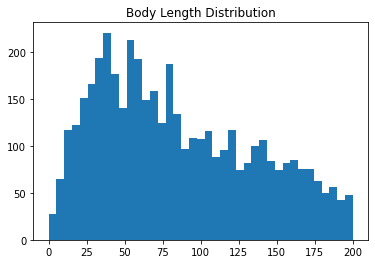

In [46]:
#plot for body length
bins = np.linspace(0, 200, 40)

pyplot.hist(dataset['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

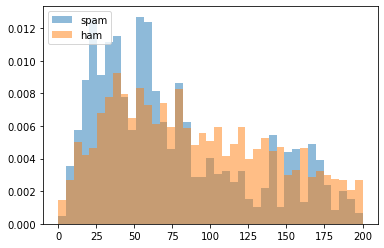

In [47]:
#Check if body_len is able to differentiate in spam and ham
bins = np.linspace(0, 200, 40)
pyplot.hist(dataset[dataset['spam']==1]['body_len'], bins, alpha=0.5,  density=True, label='spam')
pyplot.hist(dataset[dataset['spam']==0]['body_len'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

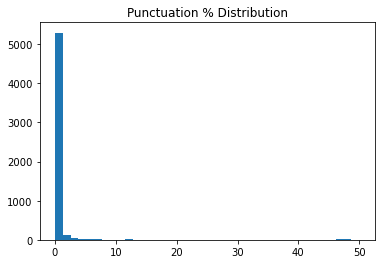

In [48]:
#plot for punctuation count
bins = np.linspace(0, 50, 40)

pyplot.hist(dataset['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

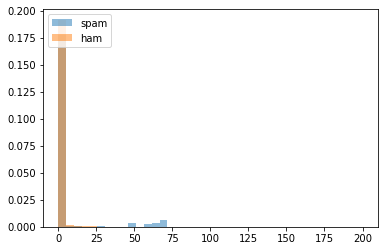

In [49]:

#Check if punct% is able to differentiate in spam and ham
bins = np.linspace(0, 200, 40)

pyplot.hist(dataset[dataset['spam']==1]['punct%'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(dataset[dataset['spam']==0]['punct%'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

Checking which vectorizer is better Count-Vectorizer or Tfidf Vectorizer

Checking Accuracy/Precision/Recall using CountVectorizer

In [50]:
#Taking independent variables separately
X_features = pd.concat([dataset['punct%'].reset_index(drop=True),dataset['body_len'].reset_index(drop=True),X_counts_df.reset_index(drop=True)], axis=1)

X_features.shape

#Divide data in train and test
X_train, X_test, y_train, y_test = train_test_split(X_features, dataset['spam'], test_size=0.2)

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label=0, average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.851 / Recall: 1.0 / Accuracy: 0.872


Checking Accuracy/Precision/Recall using Tfidf Vectorizer

In [51]:
X_features = pd.concat([dataset['punct%'].reset_index(drop=True),dataset['body_len'].reset_index(drop=True),X_tfidf_df.reset_index(drop=True)], axis=1)

X_features.shape


#Divide data in train and test
X_train, X_test, y_train, y_test = train_test_split(X_features, dataset['spam'], test_size=0.2)

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label=0, average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.879 / Recall: 1.0 / Accuracy: 0.898


Here we can definetely see that using Tfidf vectorization we get a better result so we choose tfidf vectorizer ahead

Random Forest classifier algorithm

In [52]:
#Divide data in train and test
X_train, X_test, y_train, y_test = train_test_split(X_features, dataset['spam'], test_size=0.2)

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label=0, average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.888 / Recall: 1.0 / Accuracy: 0.905


Checking best hyperparameter value to choose for better results

In [53]:
#Checing best hyperparameter value to choose for better results
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [54]:
#executing above function
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.388 / Accuracy: 0.846
Est: 10 / Depth: 20 ---- Precision: 0.99 / Recall: 0.689 / Accuracy: 0.92
Est: 10 / Depth: 30 ---- Precision: 0.991 / Recall: 0.766 / Accuracy: 0.939
Est: 10 / Depth: None ---- Precision: 0.996 / Recall: 0.846 / Accuracy: 0.96
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.353 / Accuracy: 0.838
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.636 / Accuracy: 0.909
Est: 50 / Depth: 30 ---- Precision: 0.996 / Recall: 0.829 / Accuracy: 0.956
Est: 50 / Depth: None ---- Precision: 0.989 / Recall: 0.906 / Accuracy: 0.974
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.35 / Accuracy: 0.837
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.671 / Accuracy: 0.917
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.787 / Accuracy: 0.946
Est: 100 / Depth: None ---- Precision: 0.992 / Recall: 0.888 / Accuracy: 0.97



Final evaluation


In [55]:
X_train, X_test, y_train, y_test = train_test_split(dataset[['text', 'body_len', 'punct%']], dataset['spam'], test_size=0.2)

In [56]:
tfidf_vect = TfidfVectorizer(analyzer=lemmatizing)
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,31044,31045,31046,31047,31048,31049,31050,31051,31052,31053
0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Choosing best parameters

In [58]:
rf = RandomForestClassifier(n_estimators=50, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 6.677 / Predict time: 0.725 ---- Precision: 0.988 / Recall: 0.901 / Accuracy: 0.974
